# IMBD Movie Simple Data Exploration using SQL Query

This exploration is done using SQL query requested using Python and intended to discover what additional information can be obtained from these variables. The data used in this micro project is obtained from SanberCode Data Science training.

## Import necessary module

In [2]:
from mysql.connector import connect
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Load data by connecting to MySQL database

Before this code is built, I already create database called "imbd".

In [3]:
db = connect(
    host="localhost",
    user="root",
    password="password",
    database="imdb"
)

print(db)

## Define function

The first function is used to show directors with the most movies.

In [4]:
def most_maker_director():
    db.reconnect(attempts=1, delay=0)
    cursor_db = db.cursor()
    query = '''
    SELECT
    director_name,
    COUNT(director_name) AS movie_count
    FROM movies
    GROUP BY director_name
    ORDER BY movie_count DESC
    LIMIT 5
    '''
    cursor_db.execute(query)
    data = cursor_db.fetchall()
    cursor_db.close()
    
    i = 1
    j = 0
    result = []
    for name in data:
        result.append(f"{i}. {name[0]}")
        j += 1
        i += 1
    
    return print(*result, sep="\n")

The second function is used to show the highest earning movie directors.

In [5]:
def most_profitable_director():
    db.reconnect(attempts=1, delay=0)
    cursor_db = db.cursor()
    query = '''
    SELECT
    director_name,
    SUM(gross) AS total_gross
    FROM movies
    GROUP BY director_name
    ORDER BY total_gross DESC
    LIMIT 10
    '''
    cursor_db.execute(query)
    data = cursor_db.fetchall()
    cursor_db.close()
    
    i = 1
    j = 0
    result = []
    for name in data:
        result.append("{}. {} - {:,.2f}".format(i, name[0], name[1]))
        j += 1
        i += 1
    
    return print(*result, sep="\n")

The third function is used to show most profitable movies.

In [6]:
def most_profitable_movie():
    db.reconnect(attempts=1, delay=0)
    cursor_db = db.cursor()
    query = '''
    SELECT
    movie_title,
    title_year,
    gross
    FROM movies
    ORDER BY gross DESC
    LIMIT 15
    '''
    cursor_db.execute(query)
    data = cursor_db.fetchall()
    cursor_db.close()
    
    i = 1
    j = 0
    result = []
    for movie in data:
        result.append("{}. {} ({:.0f}) - {:,.2f}".format(i, movie[0], movie[1], movie[2]))
        j += 1
        i += 1
    
    return print(*result, sep="\n")

The fourth function is used to visualize the movie budget distribution of a particular year.

In [7]:
def budget_distribution(year):
    db.reconnect(attempts=1, delay=0)
    cursor_db = db.cursor()
    query = '''
    SELECT budget
    FROM movies
    WHERE
    title_year = {} AND
    budget IS NOT NULL
    '''.format(year)
    cursor_db.execute(query)
    data = cursor_db.fetchall()
    cursor_db.close()
    
    result = []
    for budget in data:
        result.append(budget[0])
    
    sns.histplot(result,
                 bins=20,
                 kde=True,
                 color="#7f7fff")
    plt.title("Budget Movie Year {}".format(year),
              fontweight="bold",
              fontsize=15,
              pad=15)
    plt.xlabel("Budget")
    plt.ylabel("Count");
    return

### Exploration result

In [8]:
most_maker_director()

1. Steven Spielberg
2. Woody Allen
3. Martin Scorsese
4. Clint Eastwood
5. Ridley Scott


In [9]:
most_profitable_director()

1. Steven Spielberg - 4,114,233,101.00
2. Peter Jackson - 2,592,969,279.00
3. Michael Bay - 2,231,242,537.00
4. Tim Burton - 2,071,275,480.00
5. Sam Raimi - 2,049,549,198.00
6. James Cameron - 1,948,125,910.00
7. Christopher Nolan - 1,813,227,576.00
8. George Lucas - 1,741,418,480.00
9. Robert Zemeckis - 1,619,309,108.00
10. Chris Columbus - 1,618,707,624.00


As we can infer from the exploration, Stephen Spielberg ranked first both as director with the most movies and the highest earning movie director. Even though Woody Allen and Martin Scorsese come after Stephen Spielberg as directors with the most movies, they did not make much earning and they did not even rank in the top 10 of the highest earning movie director.

In [10]:
most_profitable_movie()

1. Avatar  (2009) - 760,505,847.00
2. Titanic  (1997) - 658,672,302.00
3. Jurassic World  (2015) - 652,177,271.00
4. The Avengers  (2012) - 623,279,547.00
5. The Dark Knight  (2008) - 533,316,061.00
6. Star Wars: Episode I - The Phantom Menace  (1999) - 474,544,677.00
7. Star Wars: Episode IV - A New Hope  (1977) - 460,935,665.00
8. Avengers: Age of Ultron  (2015) - 458,991,599.00
9. The Dark Knight Rises  (2012) - 448,130,642.00
10. Shrek 2  (2004) - 436,471,036.00
11. E.T. the Extra-Terrestrial  (1982) - 434,949,459.00
12. The Hunger Games: Catching Fire  (2013) - 424,645,577.00
13. Pirates of the Caribbean: Dead Man's Chest  (2006) - 423,032,628.00
14. The Lion King  (1994) - 422,783,777.00
15. Toy Story 3  (2010) - 414,984,497.00


From the exploration, we can infer that Star Wars: Episode IV - A New Hope (1977) is ranked first for around 20 years before Titanic was made in 1997. This achievement is still unbeatable by Titanic, even though Titanic makes more earning but it ranked first just for around 12 years before Avatar was made in 2009.

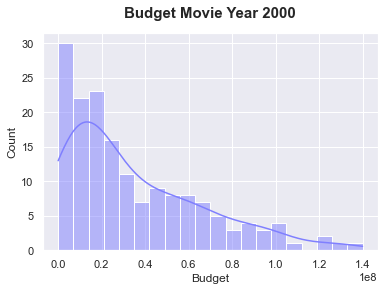

In [16]:
year = 2000
budget_distribution(year)

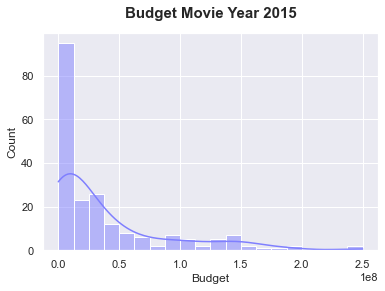

In [18]:
year = 2015
budget_distribution(year)

As we can infer from the exploration, even though there are 15 years difference there is still one similar work method in the movie industry, that is directors tend to produce movies with as low budget as possible while maintaining the movie quality.